/tmp/ipykernel_5665/1572515690.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


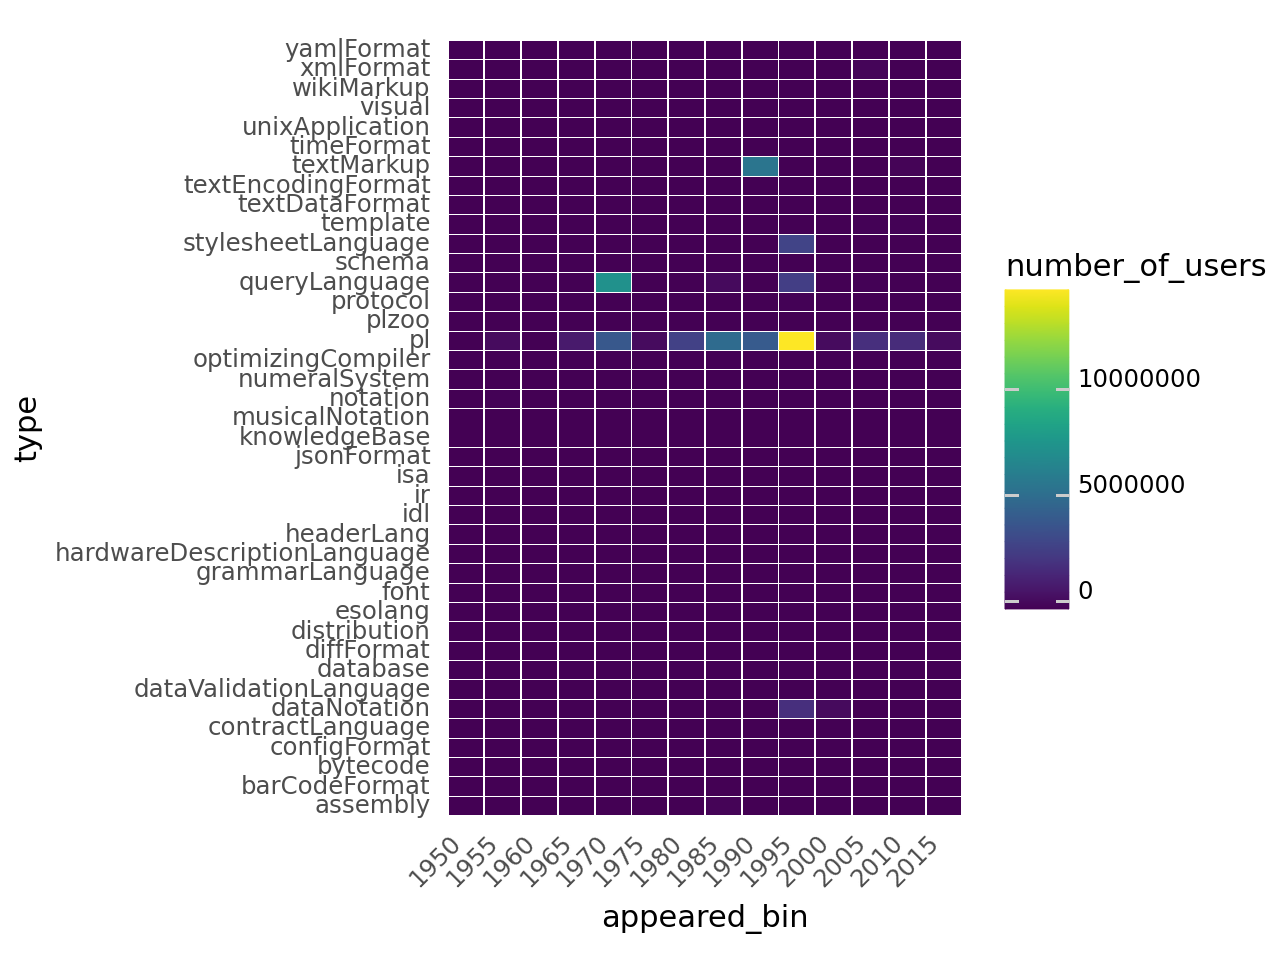

In [2]:
import pandas as pd
from plotnine import ggplot, aes, geom_tile, theme, element_text, element_blank, element_rect, position_fill

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-03-21/languages.csv"
df = pd.read_csv(url)

# Convert 'number_of_users' to numeric (if it's not already)
df['number_of_users'] = pd.to_numeric(df['number_of_users'], errors='coerce')

# Bin the 'appeared' column by 5 years
df['appeared_bin'] = pd.cut(df['appeared'], bins=range(1950, 2025, 5), right=False, labels=range(1950, 2020, 5))

# Aggregate 'number_of_users' within each bin
df_agg = df.groupby(['appeared_bin', 'type'], as_index=False)['number_of_users'].sum()

# Convert 'appeared_bin' to string type and fill NaN values with a placeholder
df_agg['appeared_bin'] = df_agg['appeared_bin'].astype(str).fillna('NaN')

# Create the annotated heatmap
annotated_heatmap = (
    ggplot(df_agg, aes(x='appeared_bin', y='type', fill='number_of_users')) +
    geom_tile(aes(width=0.95, height=0.95)) +
    theme(
        axis_ticks=element_blank(),
        panel_background=element_rect(fill='white'),
        axis_text_x=element_text(angle=45, hjust=1),  # Adjust the angle as needed
    )
)

# Show plot
print(annotated_heatmap)
